# Let's enjoy <font color="Blue">Chinese charactors' dataset</font>!

In [1]:
#Follow Kaggle's way to load datasets.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv


## 1. Import libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Read the dataset as Padas DataFrame

In [3]:
#change the dataset into Pandas dataframe
import pandas as pd
dataset = pd.read_csv("/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv")
dataset

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


## 3. Let's start labelencoding.etc!

In [4]:
#Let's start labelencoding!
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(dataset['character'].values)
decoded = le.inverse_transform(encoded)
dataset['character2'] = encoded
print('This dataset has following true labels, ', le.classes_)

This dataset has following true labels,  ['一' '七' '万' '三' '九' '二' '五' '亿' '八' '六' '十' '千' '四' '百' '零']


### Now I know this dataset has 15 classifications.

## 4.Let's make train data and test data!

In [5]:
#Then, make a dictionary. 
dic={0:'一',1:'七',2:'万',3:'三',4:'九',5:'二',6:'五',7:'亿',8:'八',9:'六',10:'十',11:'千',12:'四',13:'百',14:'零'}

In [6]:
#Shuffle data :-)
dataset_shuffled = dataset.sample(frac=1, random_state=0)
#split the shuffled dataset into explanation data and target data.
x =dataset_shuffled.iloc[:,0:4096]
y =dataset_shuffled.iloc[:,[4098]]
#Let's use sklearn's train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
#normalizes data from 1 to 0. 
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255
y_test = y_test.astype('float32')

## 5. Check the shape of dataset' images

In [8]:
#Check the shape of dataset' images
import numpy as np
np.sqrt(4096)

64.0

### Now I know this dataset has 64*64 images.

<HR>
By the way, Let's check what kinda Chinese charactors the dataset has!
<HR>

## 6. Let's check real images of the dataset.

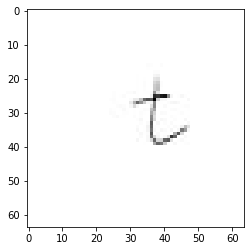

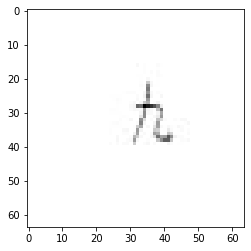

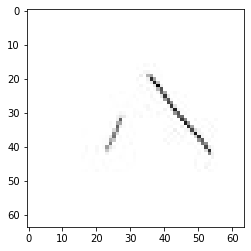

In [9]:
#import numpy and give a seed. 
import numpy as np
np.random.seed(31)
#Show 3 letter at random and convert them into gray scale letters. 
for i in range(3):
    plt.imshow(x_train.iloc[np.random.randint(0,15000)].values.reshape(64,64),cmap='Greys')
    plt.show()

In [10]:
#change data into numpy array
x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test= x_test.to_numpy()
y_test= y_test.to_numpy()

#reshape train data and test data into 64 * 64 * 1channel
x_train = x_train.reshape(x_train.shape[0], 64, 64, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1).astype('float32')

In [11]:
#convert y_train and y_test into 15 categories
y_train = kr.utils.to_categorical(y_train, 15)
y_test = kr.utils.to_categorical(y_test, 15)
num_classes = y_train.shape[1]
num_classes

15

## 6. Build an ordinary "Deep Learning" model with CNN and maxpooling by using TensorFlow Keras.

In [12]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 15)                1935      
Total params: 3,689,295
Trainable params: 3,689,295
Non-trainable params: 0
_________________________________________________________________
None


## 7.Model Fitting

In [13]:
#model fitting
model1 = model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
94/94 [==============================] - 8s 7ms/step - loss: 2.0175 - accuracy: 0.3670
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3236 - accuracy: 0.8930
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.1271 - accuracy: 0.9582
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0806 - accuracy: 0.9738
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0637 - accuracy: 0.9810
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0240 - accuracy: 0.9929
Epoch 8/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0240 - accuracy: 0.9934
Epoch 9/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0432 - accuracy: 0.9869
Epoch 10/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0154 - accuracy: 0.9963
Epoch 11/20
94/94 [

## 8. Check this model by using two metrics, loss and accuracy.

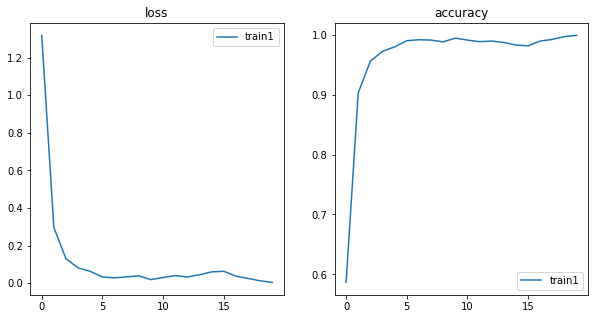

In [14]:
#Check this model by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_train1 = model1.history[metric] 

    #plot them all
    plt.plot(plt_train1, label='train1') 
    plt.legend() 
plt.show()

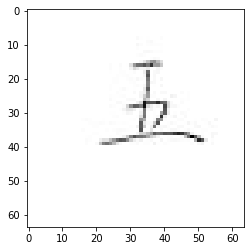

In [15]:
i=100
#Here is the prediction sample.
plt.imshow(x_test[[i]].reshape(64,64),cmap='Greys')

In [16]:
#Let's predict.
prediction=model.predict(x_test[[i]]) 
prediction

array([[5.8797954e-37, 3.8212701e-04, 6.4834952e-27, 8.9981634e-23,
        2.0031701e-17, 3.3705969e-17, 9.9961782e-01, 1.2303382e-24,
        0.0000000e+00, 7.4545319e-31, 3.8026401e-24, 1.2595357e-14,
        4.0289872e-24, 9.2442064e-25, 2.8822434e-32]], dtype=float32)

## 10. Let's check the result.

In [17]:
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],". :-)")

The answer is 五 . :-)
